<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Unsupervised%20Learning/2.1%20DBSCAN%20from%20Scratch/DBSCAN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from collections import deque
from sklearn.metrics import pairwise_distances

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        """
        Initialize the DBSCAN instance.
        :param eps: Maximum distance between two points for them to be considered neighbors.
        :param min_samples: Minimum number of neighbors required to form a core point.
        """
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        """
        Perform DBSCAN clustering from features or distance matrix.
        :param X: Input dataset (n_samples, n_features).
        :return: Cluster labels (-1 for noise).
        """
        # Initialize variables
        n_samples = X.shape[0]
        labels = np.full(n_samples, -1)  # Initialize all points as noise (-1)
        cluster_id = 0
        visited = np.zeros(n_samples, dtype=bool)  # Tracks visited points

        # Iterate over each point
        for point_idx in range(n_samples):
            if visited[point_idx]:
                continue
            visited[point_idx] = True
            neighbors = self._region_query(X, point_idx)

            # If the point is not a core point, continue
            if len(neighbors) < self.min_samples:
                labels[point_idx] = -1  # Mark as noise
            else:
                # Expand the cluster
                self._expand_cluster(X, labels, point_idx, neighbors, cluster_id, visited)
                cluster_id += 1  # Increment cluster ID for the next cluster

        self.labels_ = labels
        return self

    def _region_query(self, X, point_idx):
        """
        Find all points within eps distance of a given point.
        :param X: Input dataset.
        :param point_idx: Index of the query point.
        :return: List of neighboring point indices.
        """
        distances = np.linalg.norm(X - X[point_idx], axis=1)
        return np.where(distances <= self.eps)[0]

    def _expand_cluster(self, X, labels, point_idx, neighbors, cluster_id, visited):
        """
        Expand a new cluster from the core point.
        :param X: Input dataset.
        :param labels: Cluster labels.
        :param point_idx: Index of the starting core point.
        :param neighbors: Neighboring points of the starting core point.
        :param cluster_id: Current cluster ID.
        :param visited: Array tracking visited points.
        """
        queue = deque(neighbors)
        labels[point_idx] = cluster_id  # Assign cluster ID

        while queue:
            current_point = queue.popleft()
            if not visited[current_point]:
                visited[current_point] = True
                current_neighbors = self._region_query(X, current_point)

                # If it's a core point, add its neighbors to the queue
                if len(current_neighbors) >= self.min_samples:
                    queue.extend(current_neighbors)

            # Assign the cluster ID to border points if they are unvisited
            if labels[current_point] == -1:
                labels[current_point] = cluster_id


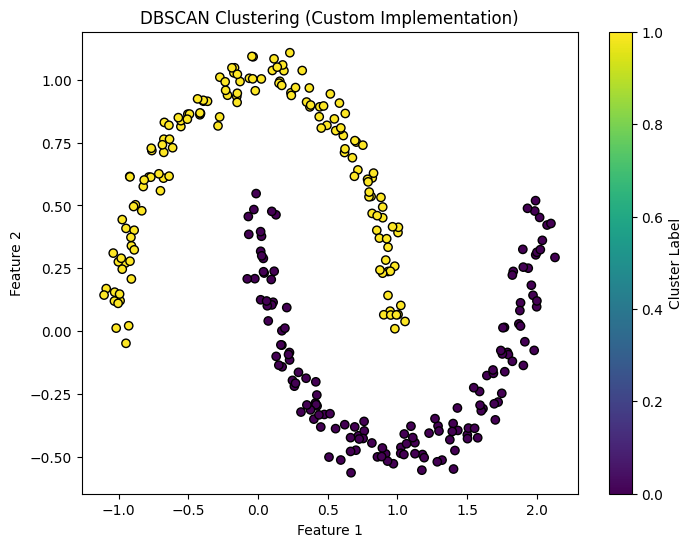

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate a dataset
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Plot the results
labels = dbscan.labels_
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering (Custom Implementation)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()


Dataset Overview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


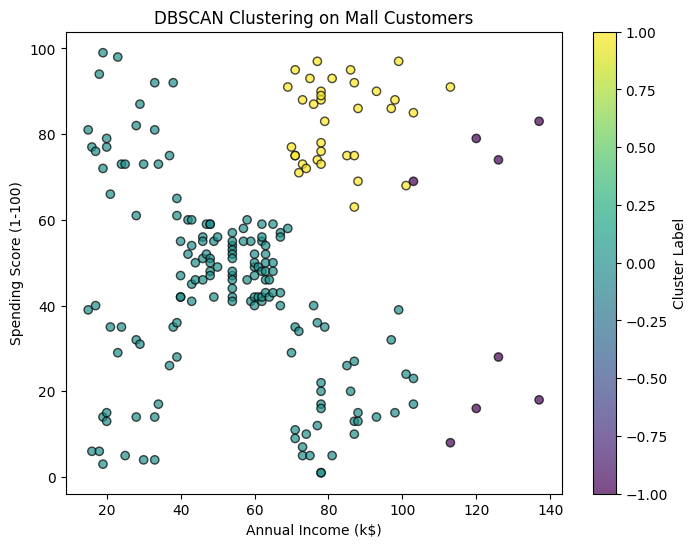

Number of clusters: 2
Number of noise points: 8


In [5]:
# Testing the algorithm on a data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "Mall_Customers.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
data.info()

# Step 1: Select relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply the custom DBSCAN implementation
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Initialize DBSCAN with hyperparameters
dbscan.fit(X_scaled)

# Step 4: Extract cluster labels
labels = dbscan.labels_

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("DBSCAN Clustering on Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.colorbar(label="Cluster Label")
plt.show()

# Step 6: Analyze the results
print("Number of clusters:", len(set(labels)) - (1 if -1 in labels else 0))  # Exclude noise
print("Number of noise points:", list(labels).count(-1))
